# Analysis on Titanic Data

I have choosen the 'Titanic Data' to analyse. 
The given file for this project contains passengers details of Titanic ship. We can explore to find the survival rate of passengers based on the data available to us. We have individual's age, sex, class(social standard based on ticket fare) and family members's count in the file. Also the port of embarkation is available to us. we will check the survival rate of passnegers based on above available details. Below are some questions for which we can find answers from the given file.
1. How is age related to the survived passengers? Passengers of which age has died most?
2. Who are the main victim, male or female?
3. How the class of any passnger is related to their survival chance?
4. Is ticket fare has any relation to the survival rate? If yes, how is that relation?
5. Is there any luck to passengers with family members compared to single passengers?
6. Passengers of which port have survived the most?
7. Is there any relation between cabin or ticket number with survival rate of passengers?

We will try to find the answers for above questions in below analysis.

In [1]:
#Importing some required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read data for CSV file
titanic_data = pd.read_csv('C:/Udacity/Python/titanic_data.csv')
#Cheking the data sample
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Finding the row count of the file
row_count = titanic_data.shape[0]
row_count

891

In [4]:
#Find out how many records are having blank information in any of the field
nans = lambda df: df[df.isnull().any(axis=1)]
nans(titanic_data).shape[0]

708

In [5]:
nans(titanic_data).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


There are 708 records having blank information in any one of the column. This number is huge compared to data provided to us. We can't remove all of these because of incompleteness. To find out the relation of survival rate with any of the parameter, we will remove those records having blank information for that particular parameter and do the analysis.

In [6]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
#Quick check on value we found by comparing their summation.
survived_data_error = titanic_data[pd.isnull(titanic_data['Survived'])]
print(survived_data_error.shape[0])

0


Hence all the records in the file having value of 'Survived' field.

# First we will find the relation between survived passengers and their 'Age'.
So now we need to find if there is any error in age details of passenger list.

In [8]:
#Finding the overall survided and dead count
survived_passenger_count = titanic_data[(titanic_data['Survived'] == 1)].Survived.eq(1).sum()
died_passenger_count = titanic_data[(titanic_data['Survived'] == 0)].Survived.eq(0).sum() 
print(survived_passenger_count, died_passenger_count)

(342, 549)


In [9]:
#Quick check on value we found by comparing their summation.
342 +549

891

In [10]:
#Finding percentage for survived and died passengers
survived_perc = float(float(survived_passenger_count)/float(row_count)) * 100
died_perc = float(float(died_passenger_count)/float(row_count)) * 100
print(survived_perc, died_perc)

(38.38383838383838, 61.61616161616161)


So we can see 38.38% passengers were able to survive, where rest 61.62% died in the accident.

In [11]:
#Find if any NULL value in AGE column
age_data_error = titanic_data[pd.isnull(titanic_data['Age'])]
print(age_data_error.shape[0])
age_data_error.head()

177


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


Hence, we can see that there are 177 records for which no age details are given. To proceed further, we will first remove the records having no age details to get a proper output details of remaining passengers.

In [12]:
#Creating a data frame with column 'Survived', 'Age' of passengers by copying from the main file to keep it
#untouched for further analysis
age_details_df = titanic_data[['Survived', 'Age']].copy()
#Get the row count to find if copy is done correcctly or not
age_details_df.shape[0]

891

In [13]:
#Removing those records having no age details from the new data frame 
age_details_df = age_details_df[pd.notnull(age_details_df['Age'])] 
#Get the row count
age_details_df.shape[0]

714

In [14]:
#Populating the minimum and maximum value to use during visualization and plotting
min_age_details = age_details_df['Age'].min()
max_age_details = age_details_df['Age'].max()
print(min_age_details)
print(max_age_details)

0.42
80.0


In [15]:
#Passengers survived
age_details_survived_df = age_details_df[(age_details_df['Survived'] == 1)]
#Passenegers who died
age_details_dead_df = age_details_df[(age_details_df['Survived'] == 0)]

In [16]:
#Survived and Died count for the new dataframe created for 'Age' analysis
print(age_details_survived_df.shape[0])
print(age_details_dead_df.shape[0])

290
424


[0, 85, 0, 250]

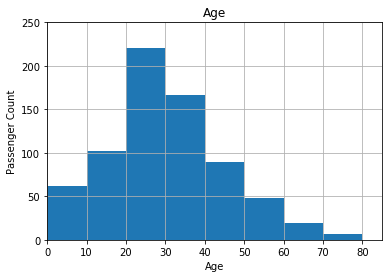

In [17]:
#Plotting histogram to see the Age distribution
bin_size = 10
max_range = int(max_age_details) + bin_size
age_details_df.hist(column='Age', bins = range(0, max_range, bin_size))
plt.xlabel('Age')
plt.ylabel('Passenger Count')
plt.axis([0, 85, 0, 250])

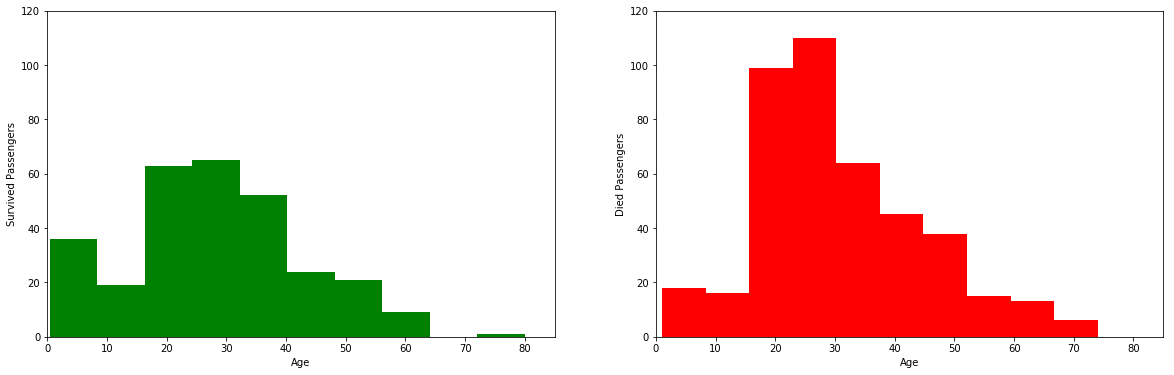

In [18]:
fig = plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
plt.hist(age_details_survived_df.set_index('Survived')['Age'],facecolor='g')
plt.axis([0, 85, 0, 120])
plt.ylabel('Survived Passengers')
plt.xlabel('Age')

plt.subplot(1,2,2)
plt.hist(age_details_dead_df.set_index('Survived')['Age'],facecolor='r')
plt.axis([0, 85, 0, 120])
plt.ylabel('Died Passengers')
plt.xlabel('Age')

Above diagrams clear one thing that, most of the passengers are from age range 20-60. As the passenger count is most for that range, so the survival or dead count is also higher for that age range passengers. The above visualization does not clearly specifies the rate. So we will try to analyse the thing with percentage value to get the clear image of survival or dead rate.
We will divide the passengers in 4 age group. 0< x <=20, 20< x <= 40, 40< x <=60, 60< x
And then we will check their survival rate.

In [19]:
#Below 20 survived passenger
below_20_survived = age_details_df[(age_details_df['Survived'] == 1) & (age_details_df['Age'] <= 20)]
print(below_20_survived.shape[0])
below_20_survived.head(2)

82


,Survived,Age
9,1,14.0
10,1,4.0


In [20]:
#Below 20 died passenger
below_20_died = age_details_df[(age_details_df['Survived'] == 0) & (age_details_df['Age'] <= 20)]
#20-40 survived passenger
a20_to_40_survived = age_details_df[(age_details_df['Survived'] == 1) & 
                                    ((age_details_df['Age'] > 20) & (age_details_df['Age'] <= 40))]
#20-40 died passenger
a20_to_40_died = age_details_df[(age_details_df['Survived'] == 0) & 
                                    ((age_details_df['Age'] > 20) & (age_details_df['Age'] <= 40))]
#40-60 survived passenger
a40_to_60_survived = age_details_df[(age_details_df['Survived'] == 1) & 
                                    ((age_details_df['Age'] > 40) & (age_details_df['Age'] <= 60))]
#40-60 died passenger
a40_to_60_died = age_details_df[(age_details_df['Survived'] == 0) & 
                                    ((age_details_df['Age'] > 40) & (age_details_df['Age'] <= 60))]
#Above 60 survived passenger
above_60_survived = age_details_df[(age_details_df['Survived'] == 1) & (age_details_df['Age'] > 60)]
#Above 60 died passenger
above_60_died = age_details_df[(age_details_df['Survived'] == 0) & (age_details_df['Age'] > 60)]

In [21]:
#Find the count for each of the above cases
below_20_survived_cnt = below_20_survived.Survived.eq(1).sum()
below_20_survived_cnt

82

In [22]:
below_20_died_cnt = below_20_died.Survived.eq(0).sum()
below_20_died_cnt

97

In [23]:
a20_to_40_survived_cnt = a20_to_40_survived.Survived.eq(1).sum()
a20_to_40_died_cnt = a20_to_40_died.Survived.eq(0).sum()
a40_to_60_survived_cnt = a40_to_60_survived.Survived.eq(1).sum()
a40_to_60_died_cnt = a40_to_60_died.Survived.eq(0).sum()
above_60_survived_cnt = above_60_survived.Survived.eq(1).sum()
above_60_died_cnt = above_60_died.Survived.eq(0).sum()
print(a20_to_40_survived_cnt,a20_to_40_died_cnt,a40_to_60_survived_cnt,
      a40_to_60_died_cnt,above_60_survived_cnt,above_60_died_cnt )

(153, 232, 50, 78, 5, 17)


In [24]:
82 + 97 + 153 + 232 + 50 + 78 + 5+ 17

714

In [25]:
#Populating one simple list for plotting a pie diagram
age_pieplot_data = [{'Column' : 'Below 20 Survived', 'Value' : below_20_survived_cnt},
                    {'Column' : 'Below 20 Died', 'Value' : below_20_died_cnt},
                    {'Column' : 'Age 20 to 40, Survived', 'Value' : a20_to_40_survived_cnt},
                    {'Column' : 'Age 20 to 40, Died', 'Value' : a20_to_40_died_cnt},
                    {'Column' : 'Age 40 to 60, Survived', 'Value' : a40_to_60_survived_cnt},
                    {'Column' : 'Above 60, Survived', 'Value' : above_60_survived_cnt},
                    {'Column' : 'Age 40 to 60, Died', 'Value' : a40_to_60_died_cnt},
                    {'Column' : 'Above 60, Died', 'Value' : above_60_died_cnt}]
age_pieplot_data

[{'Column': 'Below 20 Survived', 'Value': 82},
 {'Column': 'Below 20 Died', 'Value': 97},
 {'Column': 'Age 20 to 40, Survived', 'Value': 153},
 {'Column': 'Age 20 to 40, Died', 'Value': 232},
 {'Column': 'Age 40 to 60, Survived', 'Value': 50},
 {'Column': 'Above 60, Survived', 'Value': 5},
 {'Column': 'Age 40 to 60, Died', 'Value': 78},
 {'Column': 'Above 60, Died', 'Value': 17}]

In [26]:
#Defining a method to plot Pie diagram
def custom_pieplot(sample_data,title):
    pieplot_df = pd.DataFrame(sample_data)
    colors = ["#98be57", "#59c4a1", "#ec93dd", "#249cc2", "#db813a", "#8ea71d", "#85b0b7", "#CB5C3B"]
    #explode = (0.05, 0.1, 0.05, 0.1, 0.05, 0.1, 0.05, 0.1)
    # Create a pie chart
    plt.pie( pieplot_df['Value'], 
             #explode=explode,
             labels=pieplot_df['Column'],
             shadow=False,
             colors=colors,
             startangle=90,
             autopct='%1.1f%%',
             )

# View the plot drop above
    plt.axis('equal')
#Give Title
    plt.title(title, fontsize = 20, va='bottom')
# View the plot
    plt.tight_layout()
    plt.show()

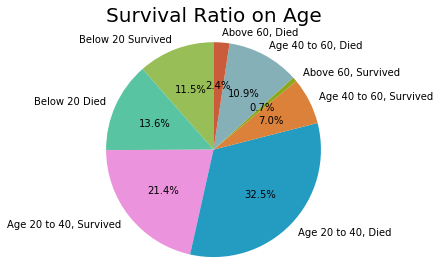

In [27]:
#Plotting the disgram
title_age = 'Survival Ratio on Age'
custom_pieplot(age_pieplot_data,title_age)

The above diagram shows better view of survival rate with age for the passengers having age details.
More than half of the passengers are or age range of 20 to 40. Precisely the ratio is 53.9% of total passengers(for which we have age details). Out of these, 21.4% have survived the accident. 
So if we consider only this age range people, 60.29% of them have been died, hence the survival rate 39.71  is low for this age range people.
Another 25.1% of total passengers, is of age range below 20. In this age range, surviving rate is slightly less than dying rate.
People above 60 are very less in count, only 3.1% of total passengers, out of which 2.4% have died. So if we consider only this age range, the survival rate is only .7/(.7+2.4)) or 22.5%, which is even lower than the rate of age group 20-40.
In all the age range, died percentage is greater than survival rate. Total survival rate is 40.61%

# Next we will find survival rate for male and female

In [28]:
#Check if there is any missing data for 'Sex' column of the file
sex_data_error = titanic_data[pd.isnull(titanic_data['Sex'])]
print(sex_data_error.shape[0])
sex_data_error.head()

0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


So there is no null data in 'Sex' column of the file. Now we will find the female and male count and cross check with the sum to validate if the records are all correct or not.

In [29]:
female_count = titanic_data[(titanic_data['Sex'] == 'female')].Sex.eq('female').sum()
female_count

314

In [30]:
male_count = titanic_data[(titanic_data['Sex'] == 'male')].Sex.eq('male').sum()
male_count

577

In [31]:
314+577

891

So we can conclude all the records are correctly maintained for 'Sex' column

In [32]:
#Survived count for FEMALE
female_survived_count = (titanic_data[(titanic_data['Survived'] == 1) & (titanic_data['Sex'] == 'female')].Survived.eq(1).sum())
#Died count for FEMALE
female_died_count = (titanic_data[(titanic_data['Survived'] == 0) & (titanic_data['Sex'] == 'female')].Survived.eq(0).sum())
#Survived count for MALE
male_survived_count = (titanic_data[(titanic_data['Survived'] == 1) & (titanic_data['Sex'] == 'male')].Survived.eq(1).sum())
#Died count for MALE
male_died_count = (titanic_data[(titanic_data['Survived'] == 0) & (titanic_data['Sex'] == 'male')].Survived.eq(0).sum())

print(female_survived_count, female_died_count, male_survived_count, male_died_count)

(233, 81, 109, 468)


In [33]:
233+ 81+ 109+ 468

891

In [34]:
#Populating one simple list for plotting a pie diagram
sex_pieplot_data = [{'Column' : 'Male_Survived', 'Value' : male_survived_count},
                    {'Column' : 'Male_Dead', 'Value' : male_died_count},
                    {'Column' : 'Female_Survived', 'Value' : female_survived_count},
                    {'Column' : 'Female_Dead', 'Value' : female_died_count}]
sex_pieplot_data

[{'Column': 'Male_Survived', 'Value': 109},
 {'Column': 'Male_Dead', 'Value': 468},
 {'Column': 'Female_Survived', 'Value': 233},
 {'Column': 'Female_Dead', 'Value': 81}]

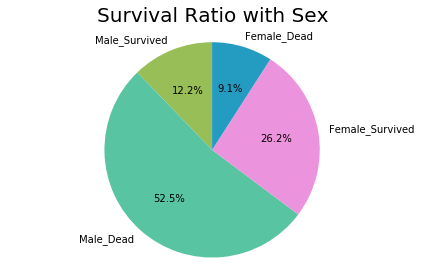

In [35]:
#Calling the method to plot the diagram
title_sex = 'Survival Ratio with Sex'
custom_pieplot(sex_pieplot_data,title_sex)

In [36]:
female_passengers = float(float(female_count)/float(row_count))*100
male_passengers = float(float(male_count)/float(row_count))*100
female_survival_rate = float(float(female_survived_count)/float(female_count)) * 100
female_dying_rate = float(float(female_died_count)/float(female_count))*100
male_survival_rate = float(float(male_survived_count)/float(male_count))*100
male_dying_rate = float(float(male_died_count)/float(male_count))*100

print(round(female_passengers, 2), round(male_passengers, 2), round(female_survival_rate, 2),
      round(female_dying_rate, 2), round(male_survival_rate, 2), round(male_dying_rate, 2))

(35.24, 64.76, 74.2, 25.8, 18.89, 81.11)


We can see that 64.7% of total passengers are MALE and 35.24% are FEMALE. It is clear from figure that, female passengers have survival rate of 74% among females, and the same is only 18.89% for male among males. 

# Survival Rate based on PCLASS of any passenger

In [37]:
#First find if any error data, then remove those
class_data_error = titanic_data[pd.isnull(titanic_data['Pclass'])]
print(class_data_error.shape[0])
class_data_error.head()

0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [38]:
#Need to find the value count for 'Pclass'
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

'pclass' is a proxy for socio-economic status (SES). 
We have 3 types of class defined in our file.
1st = Upper Class
2nd = Middle Class
3rd = Lower Class

In [39]:
class1_count = (titanic_data[(titanic_data['Pclass'] == 1)].Pclass.eq(1).sum())
class2_count = (titanic_data[(titanic_data['Pclass'] == 2)].Pclass.eq(2).sum()) 
class3_count = (titanic_data[(titanic_data['Pclass'] == 3)].Pclass.eq(3).sum()) 
print(class1_count, class2_count, class3_count)

(216, 184, 491)


In [40]:
#Checking the sum to compare
491+216+184

891

In [41]:
df_duplicates = titanic_data[titanic_data.duplicated('Name')]
df_duplicates.shape[0]

0

We can conclude the all the records of the file are having 'Pclass' details. We will now check how this class is related to the survived passengers.

In [42]:
#Get the percentage of passenger in each class
class1_perc = float(float(class1_count)/float(row_count)) * 100
class2_perc = float(float(class2_count)/float(row_count)) * 100
class3_perc = float(float(class3_count)/float(row_count)) * 100
print(round(class1_perc, 2), round(class2_perc, 2), round(class3_perc, 2))

#Finding the survived and died passengers' count based on their 'Pclass'
class1_survived_count = (titanic_data[(titanic_data['Survived'] == 1) & (titanic_data['Pclass'] == 1)].Pclass.eq(1).sum())
class2_survived_count = (titanic_data[(titanic_data['Survived'] == 1) & (titanic_data['Pclass'] == 2)].Pclass.eq(2).sum())
class3_survived_count = (titanic_data[(titanic_data['Survived'] == 1) & (titanic_data['Pclass'] == 3)].Pclass.eq(3).sum())
class1_dead_count = (titanic_data[(titanic_data['Survived'] == 0) & (titanic_data['Pclass'] == 1)].Pclass.eq(1).sum())
class2_dead_count = (titanic_data[(titanic_data['Survived'] == 0) & (titanic_data['Pclass'] == 2)].Pclass.eq(2).sum())
class3_dead_count = (titanic_data[(titanic_data['Survived'] == 0) & (titanic_data['Pclass'] == 3)].Pclass.eq(3).sum())

print(class1_survived_count, class2_survived_count, class3_survived_count,
      class1_dead_count, class2_dead_count, class3_dead_count)

(24.24, 20.65, 55.11)
(136, 87, 119, 80, 97, 372)


In [43]:
#Just some cross check of the result found
136 + 87 + 119 + 80 + 97 + 372

891

In [44]:
#Populating simple list for Pclass pie chart
pclass_pieplot_data = [{'Column' : 'class1_survived', 'Value' : class1_survived_count},
                       {'Column' : 'class1_dead', 'Value' : class1_dead_count},
                       {'Column' : 'class2_survived', 'Value' : class2_survived_count},
                       {'Column' : 'class2_dead', 'Value' : class2_dead_count},
                       {'Column' : 'class3_survived', 'Value' : class3_survived_count},
                       {'Column' : 'class3_dead', 'Value' : class3_dead_count}]


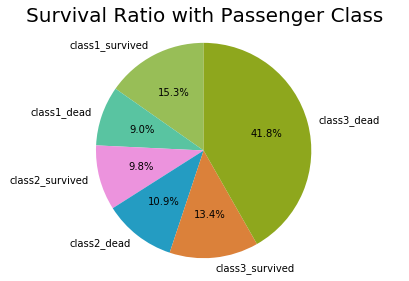

In [45]:
#Calling the method to plot the diagram
pclass_title = 'Survival Ratio with Passenger Class'
custom_pieplot(pclass_pieplot_data, pclass_title)

We know that total percentage for died is 61.62. From the above figure we can see, out of that 41.8% passengers are from class3.
Total passnegers in class1, class2 and class3 are 24.24%, 20.65%, 55.11% respectively. Percentage rate of survival considering only the passenger in that particular class is as below.

In [46]:
class1_survi_rate = float(class1_survived_count)/float(class1_count) *100
class2_survi_rate = float(class2_survived_count)/float(class2_count) *100
class3_survi_rate = float(class3_survived_count)/float(class3_count) *100

In [47]:
print(round(class1_survi_rate,2), round(class2_survi_rate,2), round(class3_survi_rate,2))

(62.96, 47.28, 24.24)


In [48]:
#Populating simple list for Pclass pie chart
class1_pieplot_data = [{'Column' : 'class1_survived', 'Value' : class1_survived_count},
                       {'Column' : 'class1_dead', 'Value' : class1_dead_count}]
class2_pieplot_data = [{'Column' : 'class2_survived', 'Value' : class2_survived_count},
                       {'Column' : 'class2_dead', 'Value' : class2_dead_count}]
class3_pieplot_data = [{'Column' : 'class3_survived', 'Value' : class3_survived_count},
                       {'Column' : 'class3_dead', 'Value' : class3_dead_count}]

class1_pieplot_df = pd.DataFrame(class1_pieplot_data)
class2_pieplot_df = pd.DataFrame(class2_pieplot_data)
class3_pieplot_df = pd.DataFrame(class3_pieplot_data)

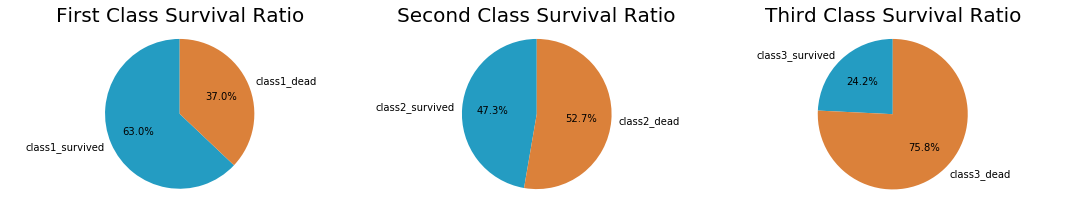

In [49]:
#Plotting pie chart to display the ratio of all the three class passenger
colors = ["#249cc2", "#db813a", "#8ea71d", "#85b0b7", "#CB5C3B"]
fig = plt.figure(figsize = (15,3))
#Sub plot 1 
plt.subplot(1,3,1)
plt.pie(class1_pieplot_df['Value'], 
    labels=class1_pieplot_df['Column'],
    shadow=False,
    colors= colors,
    startangle=90,
    autopct='%1.1f%%',
    )
plt.title('First Class Survival Ratio', fontsize = 20, va='bottom')
plt.axis('equal')
plt.tight_layout()
#Sub plot 2
plt.subplot(1,3,2)
plt.pie(class2_pieplot_df['Value'], 
    labels=class2_pieplot_df['Column'],
    shadow=False,
    colors=colors,
    startangle=90,
    autopct='%1.1f%%',
    )
plt.title('Second Class Survival Ratio', fontsize = 20, va='bottom')
plt.axis('equal')
plt.tight_layout()
#Subplot 3
plt.subplot(1,3,3)
plt.pie(class3_pieplot_df['Value'], 
    labels=class3_pieplot_df['Column'],
    shadow=False,
    colors=colors,
    startangle=90,
    autopct='%1.1f%%',
    )
plt.title('Third Class Survival Ratio', fontsize = 20, va='bottom')
plt.axis('equal')
plt.tight_layout()

plt.show()

Class1 has the highest survival rate and it is going down as we move to class2 and class3. 

# Relation of FARE and survival rate.

In [50]:
#Find data with error in FARE details
no_fare_details = titanic_data[pd.isnull(titanic_data['Fare'])]
no_fare_details.shape[0]

0

In [51]:
print(titanic_data['Fare'].mean())
print(titanic_data['Fare'].min())
print(titanic_data['Fare'].max())

32.2042079686
0.0
512.3292


As the minimum value shows 0, we will find how many records are there having fare as 0

In [52]:
#Finding the records with FARE 0
having_0_fare_df = titanic_data[(titanic_data['Fare'] == 0)]
having_0_fare_df.shape[0]

15

In [53]:
#As the number are less, we can display it here to understand those records
having_0_fare_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


The above 15 records does not show any proper reason for the 'Fare' as zero. 8 records have no age details, and others are all having age more than 19. So we can't assume the fare as 0 for passengers with age less than some specific limit. Most of them have no cabin details, all of them are male, single passenger and they all are from Southampton. Only one of these passengers survived. We are going to consider these as erroneous data and skip them for the analysis for FARE. 

In [54]:
#Make a new data frame with records having FARE greater than 0
fare_details_df = titanic_data[(titanic_data['Fare'] > 0)]

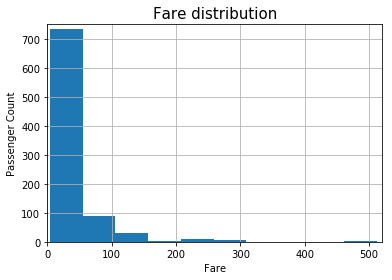

In [55]:
fare_details_df.hist(column='Fare') 

plt.title('Fare distribution', fontsize = 15)
plt.axis([0,520,0,750])
plt.xlabel('Fare')
plt.ylabel('Passenger Count')

In [56]:
#Survived count among the valid records for FARE analysis
survived_fare_df = fare_details_df[(fare_details_df['Survived'] == 1)]
#Died count among the valid records for FARE analysis
dead_fare_df = fare_details_df[(fare_details_df['Survived'] == 0)]

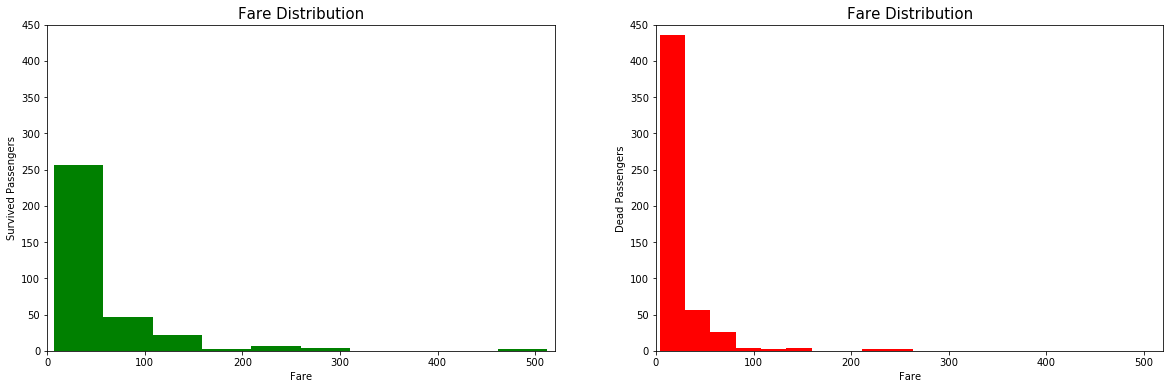

In [57]:
#Plotting the histogram for each of the group with FARE distribution
fig = plt.figure(figsize = (20,6))
#Sub plot 1, for survived passenger
plt.subplot(1,2,1)
plt.hist(survived_fare_df .set_index('Survived')['Fare'], facecolor='g')
plt.axis([0, 520, 0, 450])
plt.ylabel('Survived Passengers')
plt.xlabel('Fare')
plt.title('Fare Distribution', fontsize = 15)
#Subplot 2, for died passenger
plt.subplot(1,2,2)
plt.hist(dead_fare_df.set_index('Survived')['Fare'],facecolor='r')
plt.axis([0, 520, 0, 450])
plt.ylabel('Dead Passengers')
plt.xlabel('Fare')
plt.title('Fare Distribution', fontsize = 15)

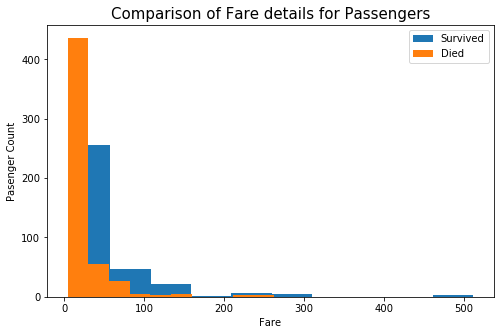

In [58]:
#dead_fare_df.rename(columns={'Fare':'D_Fare'}, inplace=True)
plt.figure(1)
#Plotting the comparison histogram
fig = plt.figure(figsize = (8,5))
ax = fig.gca()
survived_fare_df.set_index('Survived')['Fare'].plot.hist(ax = ax, label = 'Survived')
dead_fare_df.set_index('Survived')['Fare'].plot.hist(ax = ax, label = 'Died')
plt.xlabel('Fare')
plt.ylabel('Pasenger Count')
plt.title('Comparison of Fare details for Passengers', fontsize = 15)
plt.legend()

The variation of fare is from 32 unit to 512 unit. But we can see most of them are below 50 unit.
We can take the MEAN as mark and will find how many passengers are below that and how many are above that.

In [59]:
#Mean of FARE
fare_mean = fare_details_df['Fare'].mean()
#Passenger count below and equal to MEAN
pass_count_below_mean = fare_details_df[(fare_details_df['Fare'] <= fare_mean)].Fare.le(fare_mean).sum()
#Passenger count above MEAN
pass_count_above_mean = fare_details_df[(fare_details_df['Fare'] > fare_mean)].Fare.gt(fare_mean).sum()

print(round(fare_mean,2))
print(pass_count_below_mean,pass_count_above_mean)

32.76
(667, 209)


In [60]:
pass_count_gt_400 = fare_details_df[(fare_details_df['Fare'] > 400)].Fare.gt(400).sum()
print(pass_count_gt_400)

3


667 out of 876, that means 76.14% passengers paid less than or equal to 32.76 unit as fare. Only 3 passengers have paid 512.3293 unit and all of them have survived. We can check the survival rate with fare below mean and above mean.

In [61]:
#Died passenger count beow MEAN
dead_pass_below_mean = fare_details_df[(fare_details_df['Survived'] == 0) & (fare_details_df['Fare'] <= fare_mean)].Fare.le(fare_mean).sum()
#Survived passenger count below MEAN
survived_pass_below_mean = fare_details_df[(fare_details_df['Survived'] == 1) & (fare_details_df['Fare'] <= fare_mean)].Fare.le(fare_mean).sum()
#Died passenger count above MEAN
dead_pass_above_mean = fare_details_df[(fare_details_df['Survived'] == 0) & (fare_details_df['Fare'] > fare_mean)].Fare.gt(fare_mean).sum()
#Died passenger count above MEAN
survived_pass_above_mean = fare_details_df[(fare_details_df['Survived'] == 1) & (fare_details_df['Fare'] > fare_mean)].Fare.gt(fare_mean).sum()

print(dead_pass_below_mean, survived_pass_below_mean, dead_pass_above_mean, survived_pass_above_mean)

(451, 216, 84, 125)


In [62]:
#Quick check for the values found
451 + 216 + 84 + 125

876

In [63]:
876 + having_0_fare_df.shape[0]

891

Get the visualization of above values

In [64]:
#Populating simple list for Pclass pie chart
fare_pieplot_data = [{'Column' : 'Below Mean_Survived', 'Value' : survived_pass_below_mean},
                     {'Column' : 'Below Mean_Dead', 'Value' : dead_pass_below_mean},
                     {'Column' : 'Above Mean_Survived', 'Value' : survived_pass_above_mean},
                     {'Column' : 'Above Mean_Dead', 'Value' : dead_pass_above_mean}]

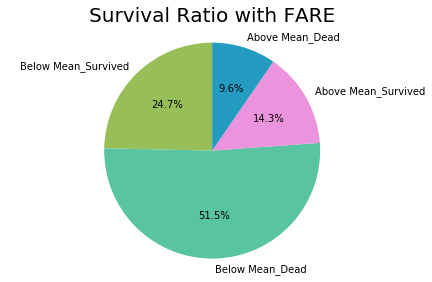

In [65]:
#Calling the method to plot the diagram
title_fare = 'Survival Ratio with FARE'
custom_pieplot(fare_pieplot_data, title_fare)

In [66]:
survival_rate_below_meanfare = float(float(survived_pass_below_mean)/float(pass_count_below_mean)) * 100
survival_rate_above_meanfare = float(float(survived_pass_above_mean)/float(pass_count_above_mean)) * 100
dead_rate_below_meanfare = float(float(dead_pass_below_mean)/float(pass_count_below_mean)) * 100
dead_rate_above_meanfare = float(float(dead_pass_above_mean)/float(pass_count_above_mean)) * 100

print(round(survival_rate_below_meanfare,2), round(survival_rate_above_meanfare,2),
      round(dead_rate_below_meanfare,2), round(dead_rate_above_meanfare,2))

(32.38, 59.81, 67.62, 40.19)


The survival rate among passengers of fare below mean is only 32.38% where as the same is 67.62% among the passengers with fare above mean. Aparently seeing the initial histogram of fare distribution, it was looking like fare was not much affectng the survival rate, the bar is higher as the frequency is more for lower range fare. But these percentage values are indicating clearly that passenger with higher fare had more chance to survive.

# Presence of family members and Survival Rate

In [67]:
titanic_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [68]:
titanic_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [69]:
#Next find if any null value in SibSp or Parch column
print(titanic_data[pd.isnull(titanic_data['SibSp'])].shape[0])
print(titanic_data[pd.isnull(titanic_data['Parch'])].shape[0])

0
0


Hence, there is no row having blank value for 'SibSp' or 'Parch' column. So the full file with 891 record will be considered for analysis.

In [70]:
#Get the passengers having no family member on boarded 
single_pass_df = titanic_data[((titanic_data['Parch'] == 0) & (titanic_data['SibSp'] == 0))]
single_pass_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [71]:
#Passenger count with no family members abroaded
single_pass_count = single_pass_df.shape[0]
single_pass_count

537

In [72]:
#Passenger with Sibling/Spouse and Parent/Children both
pass_wt_sibsp_and_parch_df = titanic_data[((titanic_data['Parch'] != 0) & (titanic_data['SibSp'] != 0))]
#Passenger with Sibling/Spouse and NO Parent/Children
pass_wt_sibsp_no_parch_df = titanic_data[((titanic_data['Parch'] == 0) & (titanic_data['SibSp'] != 0))]
#Passenger with Parent/Children and NO Sibling/Spouse
pass_no_sibsp_wt_parch_df = titanic_data[((titanic_data['Parch'] != 0) & (titanic_data['SibSp'] == 0))]

In [73]:
#Passenger count for each case
single_pass_survi_cnt = single_pass_df.Survived.eq(1).sum()
single_pass_dead_cnt = single_pass_df.Survived.eq(0).sum()
pass_wt_sibsp_sur_cnt = pass_wt_sibsp_no_parch_df.Survived.eq(1).sum()
pass_wt_sibsp_dead_cnt = pass_wt_sibsp_no_parch_df.Survived.eq(0).sum()
pass_wt_parch_sur_cnt = pass_no_sibsp_wt_parch_df.Survived.eq(1).sum()
pass_wt_parch_dead_cnt = pass_no_sibsp_wt_parch_df.Survived.eq(0).sum()
pass_wt_sibsp_and_parch_sur_cnt = pass_wt_sibsp_and_parch_df.Survived.eq(1).sum()
pass_wt_sibsp_and_parch_dead_cnt = pass_wt_sibsp_and_parch_df.Survived.eq(0).sum()

In [74]:
print(single_pass_survi_cnt ,
single_pass_dead_cnt ,
pass_wt_sibsp_sur_cnt ,
pass_wt_sibsp_dead_cnt ,
pass_wt_parch_sur_cnt ,
pass_wt_parch_dead_cnt ,
pass_wt_sibsp_and_parch_sur_cnt,
pass_wt_sibsp_and_parch_dead_cnt )

(163, 374, 70, 71, 47, 24, 62, 80)


In [75]:
#Quick check on the count sum
163+ 374+ 47+ 24+ 70+ 71+ 62+ 80

891

In [76]:
 pass_family_data = [{'Column':'Survived Single Passengers', 'Value':single_pass_survi_cnt},
                     {'Column':'Dead Single Passengers', 'Value':single_pass_dead_cnt},
                     {'Column':'Survived Passengers with SibSp', 'Value':pass_wt_sibsp_sur_cnt},
                     {'Column':'Dead Passengers with SibSp', 'Value':pass_wt_sibsp_dead_cnt},
                     {'Column':'Survived Passengers with Parch', 'Value':pass_wt_parch_sur_cnt},
                     {'Column':'Dead Passengers with Parch', 'Value':pass_wt_parch_dead_cnt},
                     {'Column':'Survived Passengers with both SibSp & Parch', 'Value':pass_wt_sibsp_and_parch_sur_cnt},
                     {'Column':'Dead Passengers with both SibSp & Parch', 'Value':pass_wt_sibsp_and_parch_dead_cnt}]

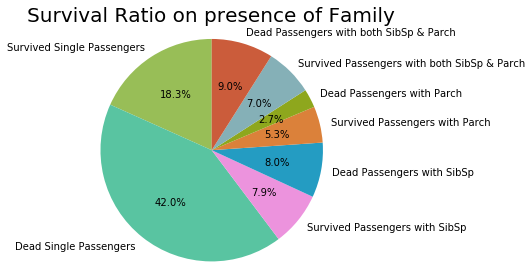

In [77]:
#Calling the method to plot the diagram
title_family = 'Survival Ratio on presence of Family'
custom_pieplot(pass_family_data,title_family)

We can see more than 60% passengers are having no family abroaded with them. This visualization is bit more in details. We will now try to get some summerised data by using two groups only. One group for single and other group for passeneger with any family members.

In [78]:
#Passenger with any family member
pass_wt_family_df = titanic_data[((titanic_data['Parch'] != 0) | (titanic_data['SibSp'] != 0))]
pass_wt_family_count = pass_wt_family_df.shape[0]
pass_wt_family_count

354

In [79]:
pass_wt_family_sur_count = pass_wt_family_df[(pass_wt_family_df['Survived'] == 1)].Survived.eq(1).sum()
pass_wt_family_dead_count = pass_wt_family_df[(pass_wt_family_df['Survived'] == 0)].Survived.eq(0).sum()
print(pass_wt_family_sur_count, pass_wt_family_dead_count)

(179, 175)


In [80]:
#Create two list for pie plot
single_pass_pie_data = [{'Column':'Survived', 'Value':single_pass_survi_cnt},
                        {'Column':'Died', 'Value':single_pass_dead_cnt}]
             
pass_wt_family_pie_data = [{'Column':'Survived', 'Value': pass_wt_family_sur_count},
                           {'Column':'Died', 'Value':pass_wt_family_dead_count}]
single_pass_pie_df = pd.DataFrame(single_pass_pie_data)
pass_wt_family_pie_df = pd.DataFrame(pass_wt_family_pie_data)

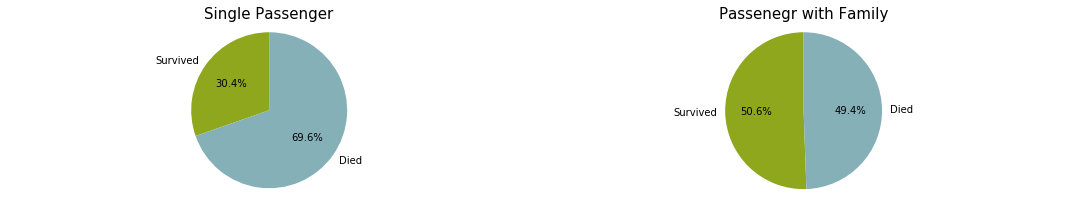

In [81]:
colors = [ "#8ea71d", "#85b0b7", "#CB5C3B"]
fig = plt.figure(figsize = (15,3))
#Subplot 1, for single passengers 
plt.subplot(1,2,1)
plt.pie(single_pass_pie_df['Value'], 
    labels=single_pass_pie_df['Column'],
    shadow=False,
    colors= colors,
    startangle=90,
    autopct='%1.1f%%',
    )
plt.title('Single Passenger', fontsize = 15)
plt.axis('equal')
plt.tight_layout()
#Subplot2, for passengers with family
plt.subplot(1,2,2)
plt.pie(pass_wt_family_pie_df['Value'], 
    labels=pass_wt_family_pie_df['Column'],
    shadow=False,
    colors=colors,
    startangle=90,
    autopct='%1.1f%%',
    )
plt.title('Passenegr with Family', fontsize = 15)
plt.axis('equal')
plt.tight_layout()
plt.show()

The survival rate for single passengers is 30.4% among all the single passengers. And the same for passenger with family among them is 50.6%. So passenegrs with family are more likely to survive than single passengers.

# Port of embarkation on survival rate

In [82]:
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

There are three port of embarkation in the file.
C = Cherbourg, Q = Queenstown, S = Southampton

In [83]:
#Quick check on value found by comparing the sum
644 + 168 +77

889

The sum is not same as row count 891 of main file. There must be some error in data.

In [84]:
#Find errorneous data
embark_error_data = titanic_data[pd.isnull(titanic_data['Embarked'])]
print(embark_error_data.shape[0])
embark_error_data.head()

2


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Two records are found in the file for which no value in maintained for 'Embarked'. We will remove these two record for our analysis.

In [85]:
#Making copy of data to keep the main file untouched for furture analysis
embark_final_df = titanic_data[['Survived','Embarked']].copy()
#Removing records having no Embarked details
embark_final_df = embark_final_df[pd.notnull(embark_final_df['Embarked'])]
embark_final_df.shape[0]

889

In [86]:
#Passenegr count from each of the port
pass_embark_s = embark_final_df[(embark_final_df['Embarked'] == 'S')].Embarked.eq('S').sum()
pass_embark_c = embark_final_df[(embark_final_df['Embarked'] == 'C')].Embarked.eq('C').sum()
pass_embark_q = embark_final_df[(embark_final_df['Embarked'] == 'Q')].Embarked.eq('Q').sum()

print(pass_embark_s, pass_embark_c, pass_embark_q)

(644, 168, 77)


In [87]:
#Quick check by sum
644+ 168+ 77

889

In [88]:
#List for pie chart
embarked_pie_data = [{'Column' : 'Southampton_Passengers', 'Value' : pass_embark_s},
                     {'Column' : 'Queenstown_Passengers', 'Value' : pass_embark_c},
                     {'Column' : 'Cherbourg_Passengers', 'Value' : pass_embark_q}]

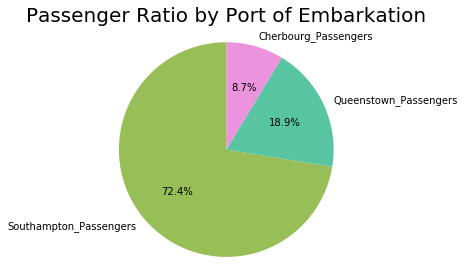

In [89]:
#Calling the method to plot the diagram
title_embark = 'Passenger Ratio by Port of Embarkation'
custom_pieplot(embarked_pie_data,title_embark)

72.4% passengers are from Southampton, 18.9% from Cherbourge and rest 8.7% are from Queenstwon among the 889 passengers. We will check now the survived and dead passengers ratio in each of the port separately

In [90]:
#Survived and died passenger count of each port
survived_pass_s = embark_final_df[(embark_final_df['Survived'] == 1) & (embark_final_df['Embarked'] == 'S')].Embarked.eq('S').sum()
dead_pass_s = embark_final_df[(embark_final_df['Survived'] == 0) & (embark_final_df['Embarked'] == 'S')].Embarked.eq('S').sum()
survived_pass_c = embark_final_df[(embark_final_df['Survived'] == 1) & (embark_final_df['Embarked'] == 'C')].Embarked.eq('C').sum()
dead_pass_c = embark_final_df[(embark_final_df['Survived'] == 0) & (embark_final_df['Embarked'] == 'C')].Embarked.eq('C').sum()
survived_pass_q = embark_final_df[(embark_final_df['Survived'] == 1) & (embark_final_df['Embarked'] == 'Q')].Embarked.eq('Q').sum()
dead_pass_q = embark_final_df[(embark_final_df['Survived'] == 0) & (embark_final_df['Embarked'] == 'Q')].Embarked.eq('Q').sum()

print(survived_pass_s, dead_pass_s, survived_pass_c, dead_pass_c , survived_pass_q,dead_pass_q )

(217, 427, 93, 75, 30, 47)


In [91]:
#Quick check by sum
217+ 427+ 93+ 75+ 30+ 47

889

In [92]:
#Prepare data frame for pie plot (217, 427, 93, 75, 30, 47)
embark_pieplot_data_all = [{'Column' : 'Southampton_Survived_Passengers', 'Value' :survived_pass_s},
             {'Column' : 'Southampton_Dead_Passengers', 'Value' : dead_pass_s},
             {'Column' : 'Queenstown_Survived_Passengers', 'Value' : survived_pass_q},
             {'Column' : 'Queenstown_Dead_Passengers', 'Value' : dead_pass_q},
             {'Column' : 'Cherbourg_Survived_Passengers', 'Value' : survived_pass_c},
             {'Column' : 'Cherbourg_Dead_Passengers', 'Value' : dead_pass_c}]

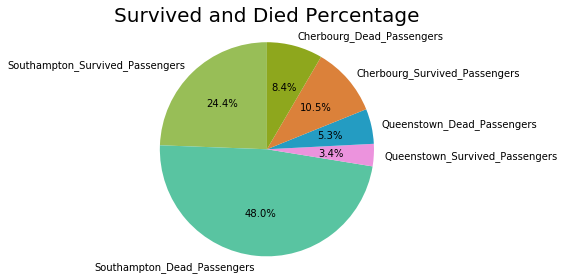

In [93]:
#Calling the method to plot the diagram
title_port2 = 'Survived and Died Percentage'
custom_pieplot(embark_pieplot_data_all, title_port2)

For Southampton, percentage of dead passengers is almost twice than the percentage of survived passengers. For Queenstown, the ratio is slightly lower than twice. And for Checbourg the survival rate is higher than the same of dead passenger.

In [94]:
#Create three list for pie plot
s_pie_data = [{'Column' : 'Survived', 'Value' : survived_pass_s},
              {'Column' : 'Died', 'Value' : dead_pass_s}]
             
q_pie_data = [{'Column' : 'Survived', 'Value' : survived_pass_q},
              {'Column' : 'Died', 'Value' : dead_pass_q}]

c_pie_data = [{'Column' : 'Survived', 'Value' : survived_pass_c},
              {'Column' : 'Died', 'Value' : dead_pass_c}]

s_pie_df = pd.DataFrame(s_pie_data)
c_pie_df = pd.DataFrame(c_pie_data)
q_pie_df = pd.DataFrame(q_pie_data)

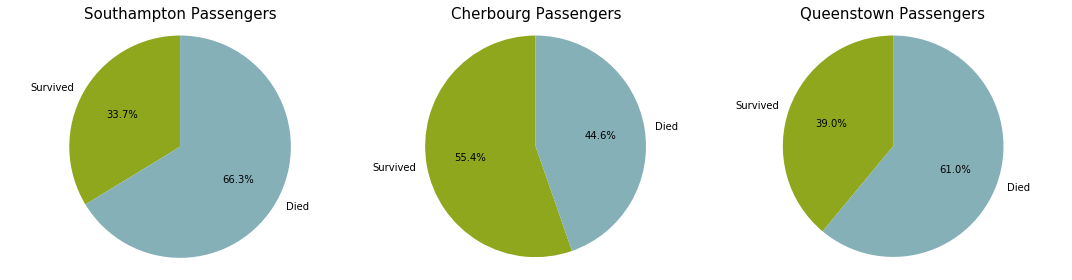

In [95]:
fig = plt.figure(figsize = (15,4))
 
plt.subplot(1,3,1)
plt.pie(s_pie_df['Value'], 
    labels=s_pie_df['Column'],
    shadow=False,
    colors= colors,
    startangle=90,
    autopct='%1.1f%%',
    )
plt.axis('equal')
plt.tight_layout()
plt.title('Southampton Passengers', fontsize = 15)

plt.subplot(1,3,2)
plt.pie(c_pie_df['Value'], 
    labels=c_pie_df['Column'],
    shadow=False,
    colors=colors,
    startangle=90,
    autopct='%1.1f%%',
    )
plt.axis('equal')
plt.tight_layout()
plt.title('Cherbourg Passengers', fontsize = 15)

plt.subplot(1,3,3)
plt.pie(q_pie_df['Value'], 
    labels=q_pie_df['Column'],
    shadow=False,
    colors=colors,
    startangle=90,
    autopct='%1.1f%%',
    )
plt.axis('equal')
plt.tight_layout()
plt.title('Queenstown Passengers', fontsize = 15)

plt.show()

So we can see only passengers from Cherbourg have the survival ratio greater than the dead ratio among themselves, other two places have survival ratio lower than the dead one.

Now we need to find if there any relationship between ticket number or cabin number with survival rate.

# Ticket Number

In [96]:
#Find if any erroneous data
ticket_error_data = titanic_data[pd.isnull(titanic_data['Ticket'])]
print(ticket_error_data.shape[0])
ticket_error_data.head()

0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [97]:
titanic_data['Ticket'].value_counts()

CA. 2343             7
347082               7
1601                 7
347088               6
CA 2144              6
3101295              6
382652               5
S.O.C. 14879         5
PC 17757             4
4133                 4
LINE                 4
349909               4
347077               4
W./C. 6608           4
113760               4
2666                 4
113781               4
19950                4
17421                4
347742               3
239853               3
110152               3
24160                3
13502                3
PC 17572             3
C.A. 34651           3
248727               3
35273                3
F.C.C. 13529         3
PC 17755             3
                    ..
330877               1
315094               1
236852               1
4137                 1
4136                 1
226593               1
4134                 1
374746               1
110813               1
C.A. 6212            1
349219               1
34218                1
343120     

If we cross check the passengers having same ticket number, generelly they are of same family as per their name. Other than that, every passenger is having a unique ticket number. And it is not practical to find any relation between ticket number and the survival rate. One interesting analysis can be done by checking the odd and even ticket number. Though this is very much strange fact, but can be done.

# Survival rate with cabin number.

In [98]:
titanic_data['Cabin'].count()

204

In [99]:
cabin_error_data = titanic_data[pd.isnull(titanic_data['Cabin'])]
no_cabin_count = cabin_error_data.shape[0]
with_cabin_data =  titanic_data[pd.notnull(titanic_data['Cabin'])]
with_cabin_count = with_cabin_data.shape[0]
print(no_cabin_count,with_cabin_count)
cabin_error_data.head()

(687, 204)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


It is very unlikely to get any relation with cabin number. We can divide the list in two group, having cabin details and having no cabin details and then can find their survival rate. If there is no cabin details in the file, we are assuming those passengers were not assiged any cabin.

In [100]:
no_cabin_survived_cnt = titanic_data[pd.isnull(titanic_data['Cabin']) & (titanic_data['Survived'] == 1)].Survived.eq(1).sum()
no_cabin_died_cnt = titanic_data[pd.isnull(titanic_data['Cabin']) & (titanic_data['Survived'] == 0)].Survived.eq(0).sum()
wt_cabin_survived_cnt = titanic_data[pd.notnull(titanic_data['Cabin']) & (titanic_data['Survived'] == 1)].Survived.eq(1).sum()
wt_cabin_died_cnt = titanic_data[pd.notnull(titanic_data['Cabin']) & (titanic_data['Survived'] == 0)].Survived.eq(0).sum()

print(no_cabin_survived_cnt, no_cabin_died_cnt, wt_cabin_survived_cnt,wt_cabin_died_cnt )

(206, 481, 136, 68)


In [101]:
#Quick check on values
206+481+136+68

891

Passenger with cabin has survival count as 136 which is higher than 68,the dead count of passenger with cabin.
But passenger with no cabin details have died count 481, which is more than twice the survived people having no cabin details. So passengers with cabin assigned were more likely to survive.

In [102]:
cabin_pie_data = [{'Column' : 'Passenger with NO Cabin', 'Value' : no_cabin_count},
                 {'Column' : 'Passenger with cabin', 'Value' : with_cabin_count}]

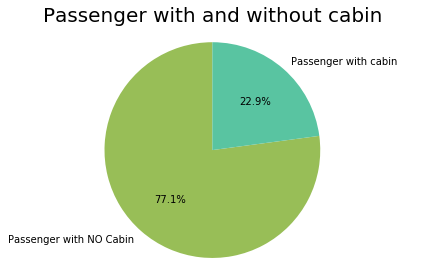

In [103]:
#Calling the method to plot the diagram
title_cabin_data = 'Passenger with and without cabin'
custom_pieplot(cabin_pie_data, title_cabin_data)

77.1% passenger have no cabin and rest are assigned with cabin

In [104]:
#Create list for pie plot
no_cabin_pie_data = [{'Column' : 'Survived', 'Value' : no_cabin_survived_cnt},
                     {'Column' : 'Died', 'Value' : no_cabin_died_cnt}]
             
wt_cabin_pie_data = [{'Column' : 'Survived', 'Value' : wt_cabin_survived_cnt},
                     {'Column' : 'Died', 'Value' : wt_cabin_died_cnt}]

no_cabin_pie_df = pd.DataFrame(no_cabin_pie_data)
wt_cabin_pie_df = pd.DataFrame(wt_cabin_pie_data)

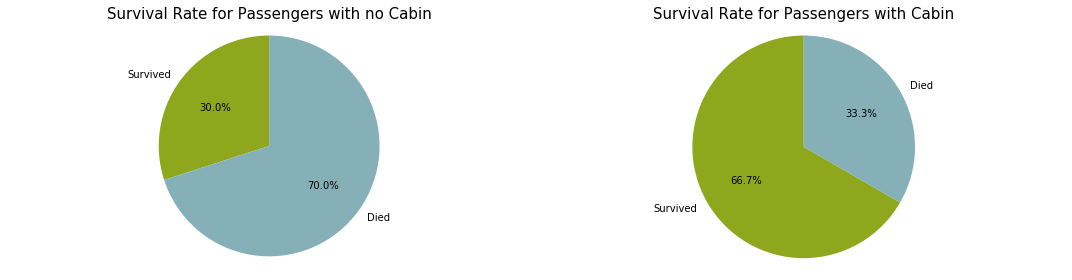

In [105]:
#Plot the pie charts
fig = plt.figure(figsize = (15,4))
#Subplot 1, Passenger with no cabin 
plt.subplot(1,2,1)
plt.pie(no_cabin_pie_df['Value'], 
    labels=no_cabin_pie_df['Column'],
    shadow=False,
    colors= colors,
    startangle=90,
    autopct='%1.1f%%',
    )
plt.axis('equal')
plt.tight_layout()
plt.title('Survival Rate for Passengers with no Cabin', fontsize = 15)

#Subplot 2, Passenger with no cabin 
plt.subplot(1,2,2)
plt.pie(wt_cabin_pie_df['Value'], 
    labels=wt_cabin_pie_df['Column'],
    shadow=False,
    colors=colors,
    startangle=90,
    autopct='%1.1f%%',
    )
plt.axis('equal')
plt.tight_layout()
plt.title('Survival Rate for Passengers with Cabin', fontsize = 15)

It is clear that passengers with cabin were more likely to survive. But from there data, we can't conclude the fact that money is the main key for the survival. We can see passenegr's with cabin details paid as less fare as 5 unit. So it is not related to money directly.

# Summery:

We can summerize that, passengers with age range 20-40 are most who died, 60.26% people of this age range died in the accident. Female passengers were given preference during the rescue operation and during the process of sending away from the ship. Ticket fare is also a key factor for the survival case.Only 32.38% of passenegrs with fare below mean survived, where the survival ratio is 67.62% among the passengers with fare above mean. The passengers with higher fare had more chance to survive.
Half of the passengers with family members had survived, where as this ratio is only about 30% for single passenger. But in this case also, it is not directly related with ticket fare. Many single passengers with higher FARE had died. 

The port of embarkation has some interesting result. Only passengers from Cherbourg has the survival rate higher than died. 
For cabin details, most of the records are not having cabin entry. It is not sure if those are missing entry or passengers were not assigned to cabin. It has been assumed to that passengers were not assigned to cabin and the analysis has been done based on that.  For ticket number, no such practical relation is found. 